## Exploratory data Analysis(EDA) for Haberman cancer survival status

### Desciption:

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

* Number of Instances: 306
* Number of Attributes: 4 (including the class attribute)

### Attribute Information:

* Age of patient at time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

### 1. High level statistics:

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

haber = pd.read_csv('haberman.csv')

print('Total datapoints:',haber.shape[0],'\nTotal Attributes:',haber.shape[1],'\n')

for x in haber.columns:
    print(x)

Total datapoints: 306 
Total Attributes: 4 

age
opyr
ax_nodes
SurvivalStatus


### Data-points per class:

In [44]:
print(haber['SurvivalStatus'].value_counts())

1    225
2     81
Name: SurvivalStatus, dtype: int64


### 2. Objective:
To classify whether a patient will survive 5 and more years or died with in 5 years from the year of treatment based on the given 3 features.

### 2D Scatter plot

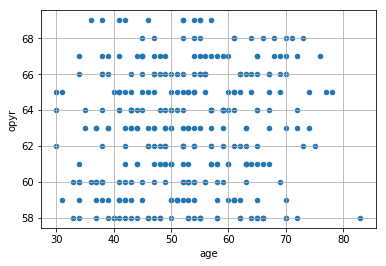

In [46]:
haber.plot(kind='scatter', x='age', y='opyr', grid=True)
plt.show()

### 3. Univariate analysis: 

C:\Users\sanja\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


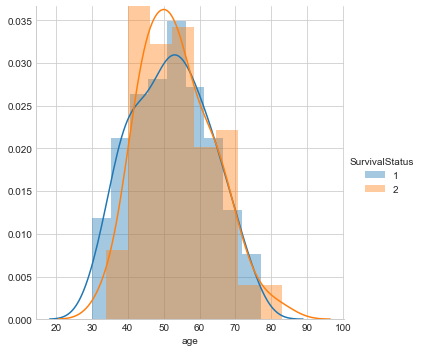

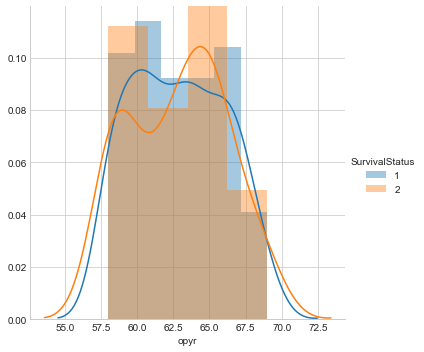

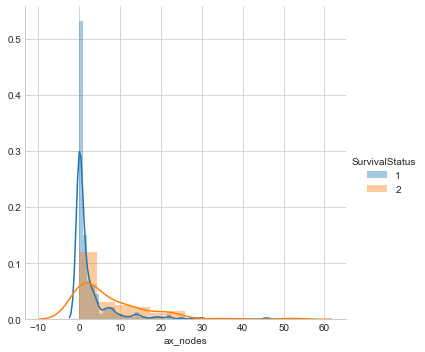

In [89]:
#PDF
sns.set_style('whitegrid')
for x in haber.columns[:-1]:
    sns.FacetGrid(haber, hue='SurvivalStatus', size=5)\
    .map(sns.distplot, x).add_legend()
    plt.show()

### Observations:

1. As seen above from age and operation(opyr) year plots it's hard to distinguish patient status as both classes overlap most probably.
2. From Positive axillary nodes(ax_nodes) plot it can be seen that patients survived more than 5 years is dense from 0 to 5(approx).  

pdf: [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
Bin edges: [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


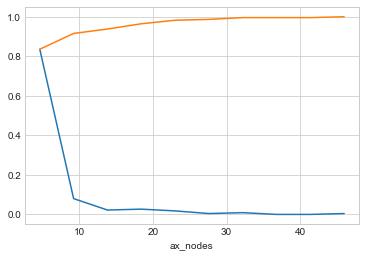

pdf: [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
Bin edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


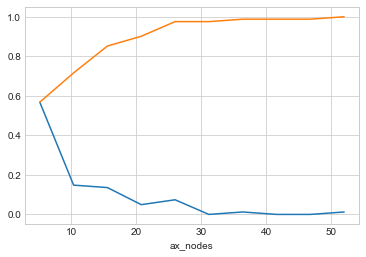

In [115]:
#CDF
haber_1 = haber.loc[ haber['SurvivalStatus']==1 ]
haber_2 = haber.loc[ haber['SurvivalStatus']==2 ]
#print(haber_1)
counts, bin_edges = np.histogram(haber_1['ax_nodes'], bins=10, density = 10)
    
pdf = counts/sum(counts)
print('pdf:',pdf)
print('Bin edges:',bin_edges)

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('ax_nodes')
plt.show()
 
counts, bin_edges = np.histogram(haber_2['ax_nodes'], bins=10, density = 10)
    
pdf = counts/sum(counts)
print('pdf:',pdf)
print('Bin edges:',bin_edges)

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('ax_nodes')

plt.show()

### Observations:
1. 83% of patients who survived more than 5 years have less than 5 positive axillary nodes.
2. 56% of patients who survived less than 5 years have less than 6
positive axillary nodes.

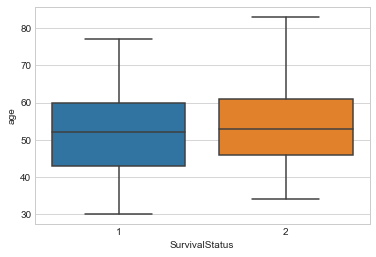

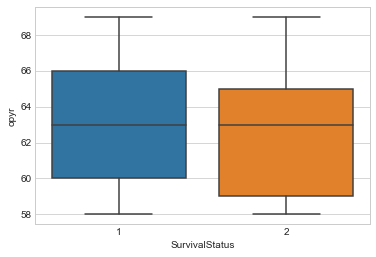

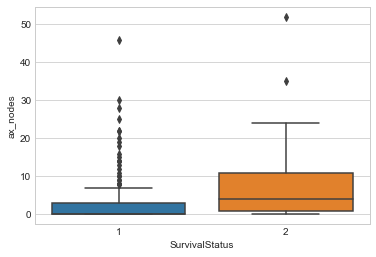

In [119]:
#Box Plot and whiskers
for f in haber.columns[:-1]: 
    sns.boxplot(x='SurvivalStatus', y=f, data=haber)
    plt.show()

### observations:
1. From the box plots above patients treated before 1959 have less chances of survival and those treated after 1966 have higher chances of survival   

C:\Users\sanja\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


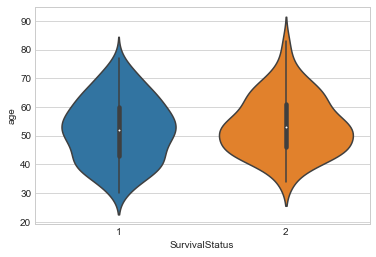

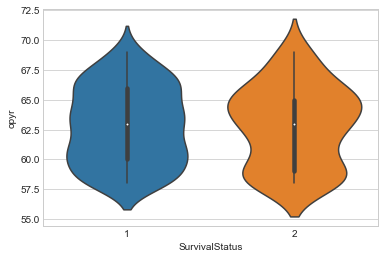

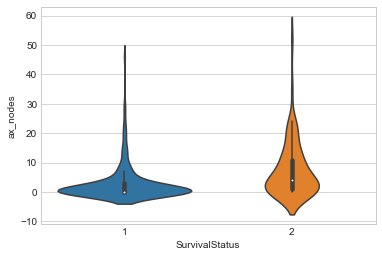

In [121]:
for f in haber.columns[:-1]:
    sns.violinplot(x='SurvivalStatus', y=f, data=haber, size=8)
    plt.show()